    instance  g_best_cost  g_n_v  g_avg_time  sa_avg_cost  sa_best_cost  \
0       C101        199.8    3.0      1310.7       199.80         199.8   
1       C102        143.5    3.0     18000.0       155.08         143.5   
2       C103        224.6    3.0     18000.0       203.90         203.9   
3       C104        182.0    3.0     18000.0       181.80         181.8   
4       C105        210.6    3.0     18000.0       206.90         206.9   
..       ...          ...    ...         ...          ...           ...   
163    RC204        975.2    6.0     18000.0       503.34         491.4   
164    RC205        879.5    4.0     18000.0       770.64         762.9   
165    RC206        720.2    5.0     18000.0       588.40         573.7   
166    RC207       1197.2    4.0     18000.0       611.14         599.5   
167    RC208        797.0    6.0     18000.0       507.26         499.8   

     sa_n_v  sa_avg_time  ig_avg_cost  ig_best_cost  ig_n_v  ig_avg_time  \
0         3          7.

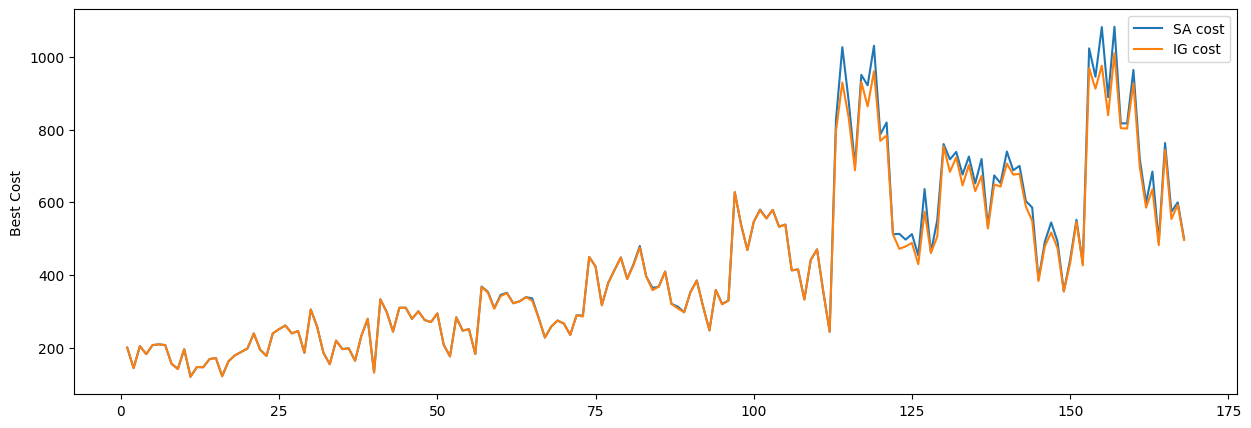

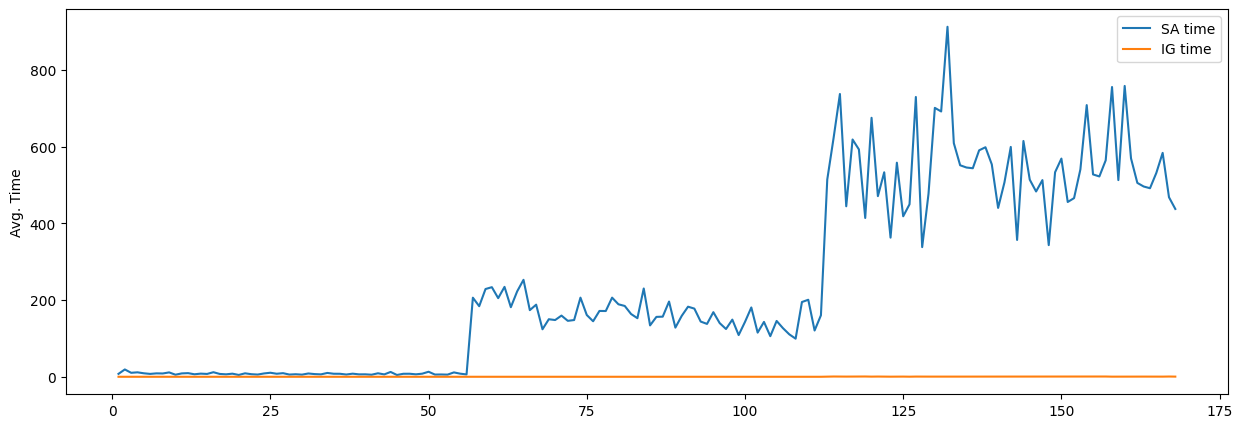

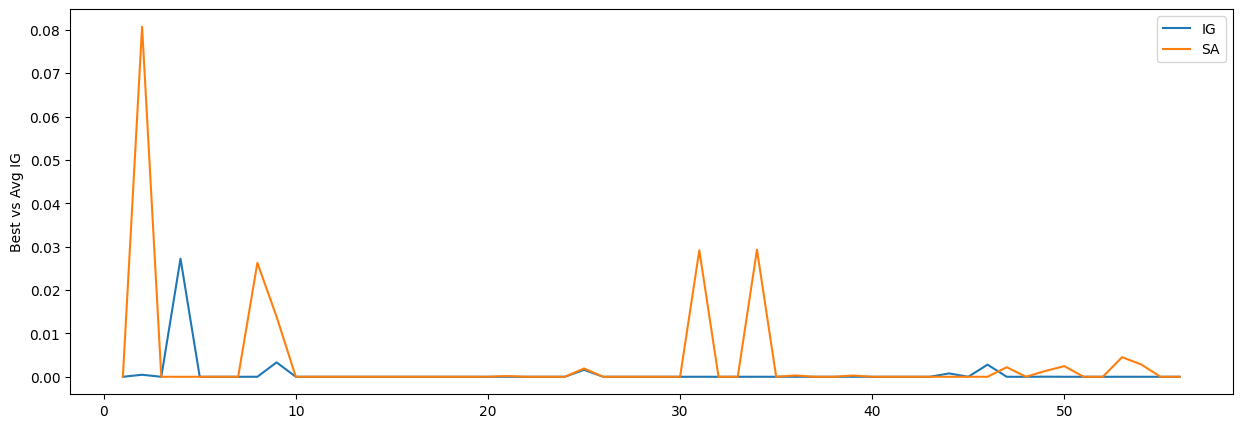

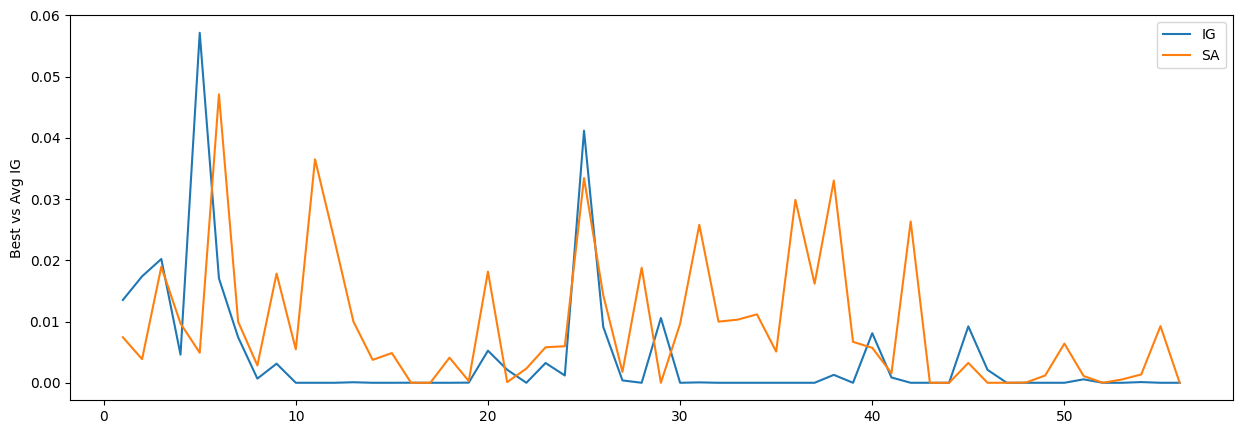

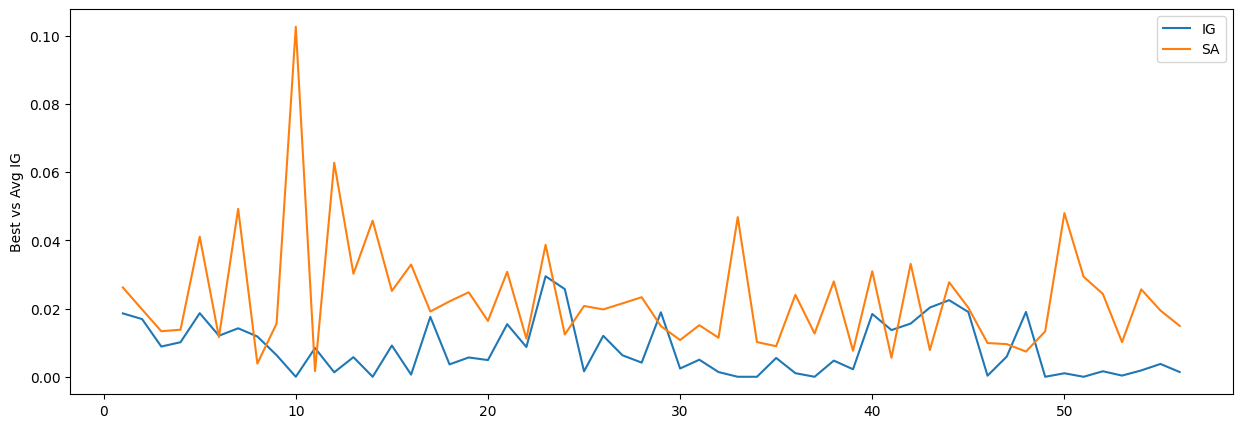

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

arquivo = pd.read_csv('everyone')

ig_costs = list(arquivo['ig_best_cost'])
g_costs = list(arquivo['g_best_cost'])
sa_costs = list(arquivo['sa_best_cost'])

ig_avg_costs = list(arquivo['ig_avg_cost'])
sa_avg_costs = list(arquivo['sa_avg_cost'])

lit_costs = list()

for index, cost in enumerate(g_costs):
    
    if ((not math.isnan(cost)) and cost < sa_costs[index]):
        lit_costs.append(cost)
    else:
        lit_costs.append(sa_costs[index])


print(arquivo)

plt.figure(figsize=(15, 5))

plt.ylabel('Best Cost')
plt.plot([x for x in range(1,169)],lit_costs, label="SA cost")
plt.plot([x for x in range(1,169)],ig_costs, label="IG cost")
plt.legend()
plt.show()

lit_avg_time = list(arquivo['sa_avg_time'])
ig_avg_time = list(arquivo['ig_avg_time'])

plt.figure(figsize=(15, 5))

plt.ylabel('Avg. Time')
plt.plot([x for x in range(1,169)],lit_avg_time, label = "SA time")
plt.plot([x for x in range(1,169)],ig_avg_time, label = "IG time")
plt.legend()
plt.savefig("texte.pdf", bbox_inches='tight')
plt.show()



dif_best_avg_ig = list()
dif_best_avg_sa = list()

for i in range(len(ig_avg_costs)):
    dif_best_avg_ig.append((ig_avg_costs[i] - ig_costs[i])/ig_costs[i])
    dif_best_avg_sa.append((sa_avg_costs[i] - sa_costs[i])/sa_costs[i])

# print(dif_best_avg_ig)

plt.figure(figsize=(15, 5))

plt.ylabel('Best vs Avg IG')
# plt.plot([x for x in range(1,169)],dif_best_avg_ig, label="IG")
# plt.plot([x for x in range(1,169)],dif_best_avg_sa, label="SA")
plt.plot([x for x in range(1,57)],dif_best_avg_ig[0:56], label="IG")
plt.plot([x for x in range(1,57)],dif_best_avg_sa[0:56], label="SA")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.ylabel('Best vs Avg IG')
# plt.plot([x for x in range(1,169)],dif_best_avg_ig, label="IG")
# plt.plot([x for x in range(1,169)],dif_best_avg_sa, label="SA")
plt.plot([x for x in range(1,57)],dif_best_avg_ig[56:112], label="IG")
plt.plot([x for x in range(1,57)],dif_best_avg_sa[56:112], label="SA")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.ylabel('Best vs Avg IG')
# plt.plot([x for x in range(1,169)],dif_best_avg_ig, label="IG")
# plt.plot([x for x in range(1,169)],dif_best_avg_sa, label="SA")
plt.plot([x for x in range(1,57)],dif_best_avg_ig[112:269], label="IG")
plt.plot([x for x in range(1,57)],dif_best_avg_sa[112:269], label="SA")
plt.legend()
plt.show()

In [24]:

from scipy import stats
print("Shapiro-Wilk para custo")
shapiro_test_ig = stats.shapiro(ig_costs)
shapiro_test_sa = stats.shapiro(lit_costs)
print(shapiro_test_ig)
print(shapiro_test_sa)
print("\n\n")

print("Shapiro-Wilk para tempo")
shapiro_test_ig = stats.shapiro(ig_avg_time)
shapiro_test_sa = stats.shapiro(lit_avg_time)
print(shapiro_test_ig)
print(shapiro_test_sa)
print("\n\n")

# print(ig_costs)
# print(sa_costs)

print("Wilcoxon para custo")
test = stats.wilcoxon(ig_costs,lit_costs,method="auto")
print(test)
print("\n\n")

print("Wilcoxon para tempo")
test = stats.wilcoxon(ig_avg_time,lit_avg_time,method="auto")
print(test)
print("\n\n")


Shapiro para custo
ShapiroResult(statistic=0.9210823526828924, pvalue=6.507282985197759e-08)
ShapiroResult(statistic=0.9125393270410042, pvalue=1.763490730203332e-08)



Shapiro para tempo
ShapiroResult(statistic=0.7249767507314484, pvalue=2.2245812639024686e-16)
ShapiroResult(statistic=0.8553267674529466, pvalue=1.3621053612967167e-11)



Wilcoxon para custo
WilcoxonResult(statistic=2.0, pvalue=3.900279563531634e-14)



Wilcoxon para tempo
WilcoxonResult(statistic=0.0, pvalue=2.5468263428122084e-29)



